In [16]:
import numpy as np
import pandas as pd

## this notebook is used to generate the metrics related figures

In [17]:
dict_param = np.load('../data/dict_param_all_12.npy', allow_pickle=True).item()

In [18]:
bipartite = dict_param['poi_cbg_visits_list'][0]

In [19]:
bipartite = np.load('../data/bipartite_weight_12.npy', allow_pickle=True).item()

In [20]:
vax_2022 = pd.read_csv('../data/vac_inferred_lvm_20229.csv')

unvax = np.zeros_like(dict_param['unvax'])

for i, row in vax_2022.iterrows():
    census_block_group = int(row['census_block_group'])
    vac_rate_inferred = row['vac_rate_inferred']
    if census_block_group in dict_param['cbgs_to_idxs']:
        unvax[dict_param['cbgs_to_idxs'][census_block_group]] = 1 - vac_rate_inferred / 100

In [21]:
proposed_change = np.load('../data/campaign_2022.npz')

In [22]:
unvax = unvax + dict(proposed_change)['v']

In [23]:
unvax.mean()

0.37234596302542744

In [24]:
# vaccine_dist['original'] + unvax

In [25]:
bipartite, unvax.shape

(<4310261x214697 sparse matrix of type '<class 'numpy.float64'>'
 	with 532491686 stored elements in Compressed Sparse Row format>,
 (214697,))

In [26]:
upper = bipartite.T @ (bipartite @ unvax)
lower = bipartite.T @ (bipartite @ np.ones(len(unvax)))

In [13]:
key = (0.5, 0.001, 0.0, 100000.0, 720)

In [14]:
import os

state_codes = []

for path in os.listdir('../results/centrality_files/'):
    if 'bipartite_normed_product_' in path:
        try: 
            state_codes.append(int(path.split('_')[-1].split('.')[0]))
        except:
            pass

In [15]:
states = np.array(dict_param['all_unique_cbgs']) // 10000000000

In [16]:
neighbor_vax = np.array(upper / lower)

/tmp/ipykernel_164110/2588649211.py:1: RuntimeWarning: invalid value encountered in true_divide
  neighbor_vax = np.array(upper / lower)


In [17]:
upper, lower

(array([ 282.39906203,  466.69224123,  271.67083107, ...,  634.37709292,
         651.09923437, 1163.47468549]),
 array([ 698.29811372, 1248.68991108,  880.11413281, ..., 3465.76387708,
        3530.27980523, 6286.35101231]))

In [18]:
vaccine_dist = np.load('../results/vax_distribution_2022.npy', allow_pickle=True).item()

In [19]:
vaccine_dist.keys()

dict_keys(['original', 'shuffle', 'reverse_within', 'exchange', 'order'])

In [20]:
upper_exc = bipartite.T @ (bipartite @ vaccine_dist['exchange'])

In [21]:
neighbor_vax_exc = upper_exc / lower

/tmp/ipykernel_164110/1548294726.py:1: RuntimeWarning: invalid value encountered in true_divide
  neighbor_vax_exc = upper_exc / lower


In [22]:
cbg_list = [cbg for cbg in dict_param['cbgs_to_idxs']]

In [23]:
county_list = [cbg // 10000000 for cbg in dict_param['cbgs_to_idxs']]

In [24]:
import pandas as pd

data = []

centrality = [0] * len(dict_param['unvax'])

for i in range(len(dict_param['unvax'])):
    data.append({
        'cbg': cbg_list[i],
        'state': states[i],
        'county': county_list[i],
        'centrality': lower[i], 
        'vax': vaccine_dist['original'][i], 
        # dict_param['unvax'][i],
        'neighbor_vax': 1 - neighbor_vax[i],
#         'vax_group': int((1 - dict_param['unvax'][i]) * 20),
        'vax_exchange': vaccine_dist['exchange'][i],
        'neighbor_vax_exchange': 1 - neighbor_vax_exc[i],
        'cbg_size': dict_param['cbg_sizes'][i],
    })

data = pd.DataFrame.from_dict(data)

In [31]:
feat = feat[feat['strategy_algo'] == 1]

0        0
1        1
2        0
3        0
4        0
        ..
39522    0
39523    0
39524    0
39525    0
39526    0
Name: strategy_algo, Length: 39527, dtype: int64

In [34]:
data['selected'] = data['cbg'].isin(set(feat['cbg_id'])).astype(int)

In [36]:
data['log_centrality'] = np.log10(1+data['centrality'])

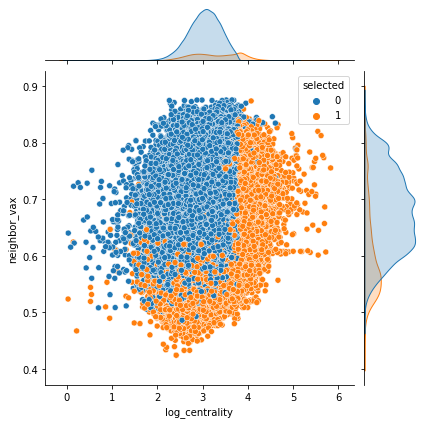

In [46]:
import seaborn as sns

sns.jointplot(x='log_centrality', y='neighbor_vax', hue='selected', data=data)

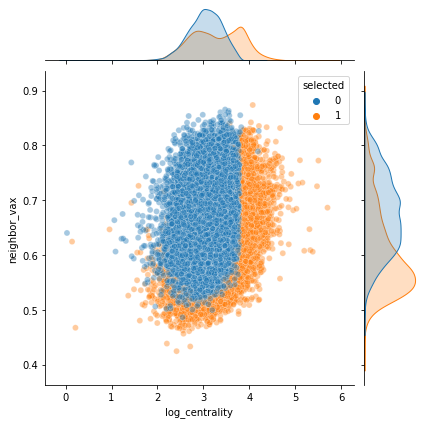

In [55]:
import seaborn as sns

sns.jointplot(x='log_centrality', y='neighbor_vax', hue='selected', data=sample, alpha=0.4)

In [51]:
sample = pd.concat([data[data['selected'] == 1].sample(10000), data[data['selected'] == 0].sample(10000)])

In [71]:
sample['selected'] = ['Yes'] * 10000 + ['No'] * 10000

<Figure size 1440x1440 with 0 Axes>

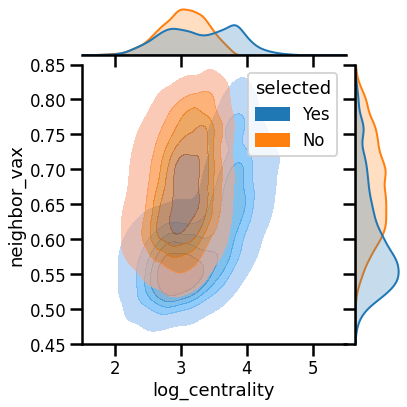

In [72]:
import seaborn as sns
import matplotlib.pylab as plab
import matplotlib.pyplot as plt


plt.figure(figsize=(20,20))
sns.set_context('poster', font_scale=0.75)
ax = sns.jointplot(x='log_centrality', y='neighbor_vax', hue='selected', kind='kde', data=sample, levels=6, fill=True, joint_kws={'alpha': 0.6}, xlim=(1.5,5.5), ylim=(0.45,0.85))
plt.savefig('target_describe.pdf')

In [73]:
data.to_csv('data_neighbor_vax.csv')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plab
import matplotlib.pyplot as plt

data = pd.read_csv('data_neighbor_vax.csv')


In [9]:
sample = pd.concat([data[data['selected'] == 1].sample(10000), data[data['selected'] == 0].sample(10000)])
sample['selected'] = ['Yes'] * 10000 + ['No'] * 10000

<Figure size 1440x1440 with 0 Axes>

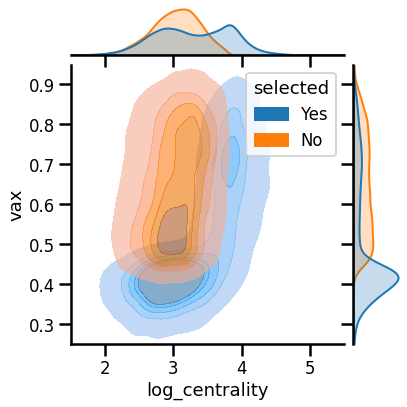

In [6]:

plt.figure(figsize=(20,20))
sns.set_context('poster', font_scale=0.75)
ax = sns.jointplot(x='log_centrality', y='vax', hue='selected', kind='kde', data=sample, levels=6, fill=True, joint_kws={'alpha': 0.6}, xlim=(1.5,5.5), ylim=(0.25,0.95))
plt.savefig('target_describe_.pdf')

In [12]:
import scipy.stats 
import numpy as np

data = data.replace(np.nan, 0)

sample = pd.concat([data[data['selected'] == 1].sample(10000), data[data['selected'] == 0].sample(10000)])
sample['selected'] = [1] * 10000 + [0] * 10000 #['Yes'] * 10000 + ['No'] * 10000
scipy.stats.pearsonr(data['vax'], data['selected']), scipy.stats.pearsonr(data['neighbor_vax'], data['selected'])

((-0.404440413206094, 0.0), (-0.3775874010292247, 0.0))

In [13]:
scipy.stats.pearsonr(sample['vax'], sample['selected']), scipy.stats.pearsonr(sample['neighbor_vax'], sample['selected'])

((-0.47616129692658726, 0.0), (-0.45424833688889754, 0.0))

In [15]:
data.groupby('selected')[['vax', 'neighbor_vax']].mean()

,vax,neighbor_vax
selected,,
0,0.64797,0.677771
1,0.49699,0.603660


In [67]:
legend = ax.ax_joint.get_legend()

In [ ]:
legend.

In [ ]:
import scipy.stats 

scipy.stats.pearsonr(data['vax'], 
            data['neighbor_vax'])

# before

In [ ]:
import scipy.stats 

scipy.stats.pearsonr(data['vax'], 
            data['neighbor_vax'])

# after

In [24]:
data.groupby('county')['centrality'].sum()

county
1001     117112.193453
1003     558637.336117
1005      20267.280262
1007      36849.073670
1009     127672.980962
             ...      
56037     17057.379743
56039     13776.943073
56041      9097.472813
56043      2442.470190
56045      2028.391822
Name: centrality, Length: 3105, dtype: float64

In [118]:
data['vax_times_cbg'] = data['vax'] * data['cbg_size']

In [119]:
data['log_centrality'] = np.log10(data['centrality'] + 1.0)

In [120]:
data_avg = data.groupby('state')[['log_centrality', 'vax', 'neighbor_vax']].mean().reset_index()

In [121]:
data_avg.columns = ['state', 'log_centrality_avg', 'vax_avg', 'neighbor_vax_avg']

In [122]:
data_std = data.groupby('state')[['log_centrality', 'vax', 'neighbor_vax']].std().reset_index()

In [123]:
data_std.columns = ['state', 'log_centrality_std', 'vax_std', 'neighbor_vax_std']

In [124]:
data = data.merge(data_std, on='state')

In [125]:
data = data.merge(data_avg, on='state')

In [126]:
data['z_vax'] = (data['vax'] - data['vax_avg']) / data['vax_std']
data['z_log_centrality'] = (data['log_centrality'] - data['log_centrality_avg']) / data['log_centrality_std']
data['z_neighbor_vax'] = (data['neighbor_vax'] - data['neighbor_vax_avg']) / data['neighbor_vax_std']

## this illustrates the computatons of z-scores in appendix

In [34]:
data.dropna(inplace=True)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
data['vax'].mean()

0.6201739517215425

(array([0.0000e+00, 0.0000e+00, 1.0000e+00, 3.8000e+01, 1.1100e+02,
        3.5300e+02, 2.1700e+03, 8.3080e+03, 1.7435e+04, 2.5193e+04,
        2.6098e+04, 2.3664e+04, 2.1520e+04, 2.1418e+04, 2.1662e+04,
        1.9319e+04, 1.5908e+04, 8.9010e+03, 1.4740e+03, 1.1210e+03]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

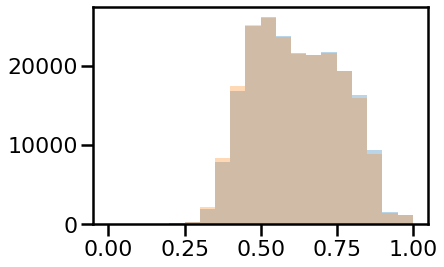

In [130]:
plt.hist(data['vax'], alpha=0.3, bins=[k*0.05 for k in range(21)])
plt.hist(data['vax_exchange'], alpha=0.3, bins=[k*0.05 for k in range(21)])

/sailhome/zhaosj12/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<Figure size 576x576 with 0 Axes>

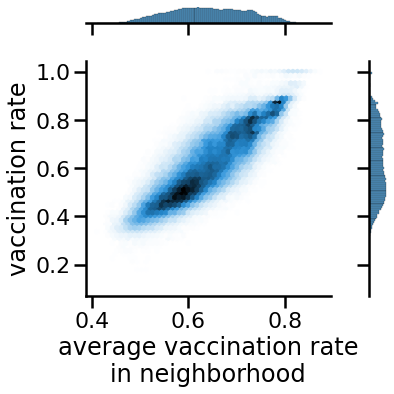

In [30]:


sns.set_context('poster', font_scale=1.)

plt.figure(figsize=(8, 8))

g = sns.jointplot(data=data, 
             x='neighbor_vax',
             y='vax',
             kind='hex'
            )

# sns.regplot(data=data,
#             x='neighbor_vax', 
#             y='vax', 
#             color='red',
#             ax=g.ax_joint, scatter=False)

# plt.title('original distribution')
plt.ylabel('vaccination rate')
plt.xlabel('average vaccination rate\nin neighborhood')
plt.tight_layout()
# plt.savefig('../results/homophily_metric_2022.pdf')

In [146]:
import scipy.stats

scipy.stats.pearsonr(data['neighbor_vax_exchange'], data['vax_exchange'])

(-0.21650725888781716, 0.0)

In [153]:
data['vax_exchange'].std(), data['vax'].std()

(0.14468400384553137, 0.14468400384553134)

/sailhome/zhaosj12/.pyenv/versions/3.8.3/lib/python3.8/site-packages/seaborn/axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<Figure size 576x576 with 0 Axes>

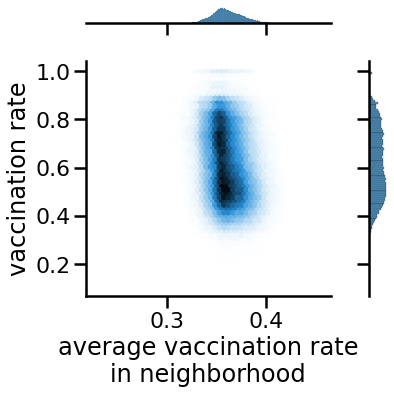

In [142]:
plt.figure(figsize=(8, 8))

g = sns.jointplot(data=data, 
             x='neighbor_vax_exchange',
             y='vax_exchange',
             kind='hex'
            )
# sns.regplot(data=data,
#             x='neighbor_vax_exchange', 
#             y='vax_exchange', 
#             color='red',
#             ax=g.ax_joint, scatter=False)

plt.ylabel('vaccination rate')
plt.xlabel('average vaccination rate\nin neighborhood')
# plt.title('exchange counterfactual')
plt.tight_layout()
plt.savefig('../results/homophily_metric_exchange_2022.pdf')

In [147]:
def decile(x):
    x = int(x*10)+1
    if x==11:
        x=10
    return x

rankings = data[['z_log_centrality']].rank(pct=True).applymap(decile)

data['decile_z_log_centrality'] = rankings

rankings = data[['z_neighbor_vax']].rank(pct=True).applymap(decile)

data['decile_z_neighbor_vax'] = rankings


rankings = data[['log_centrality']].rank(pct=True).applymap(decile)

data['decile_log_centrality'] = rankings


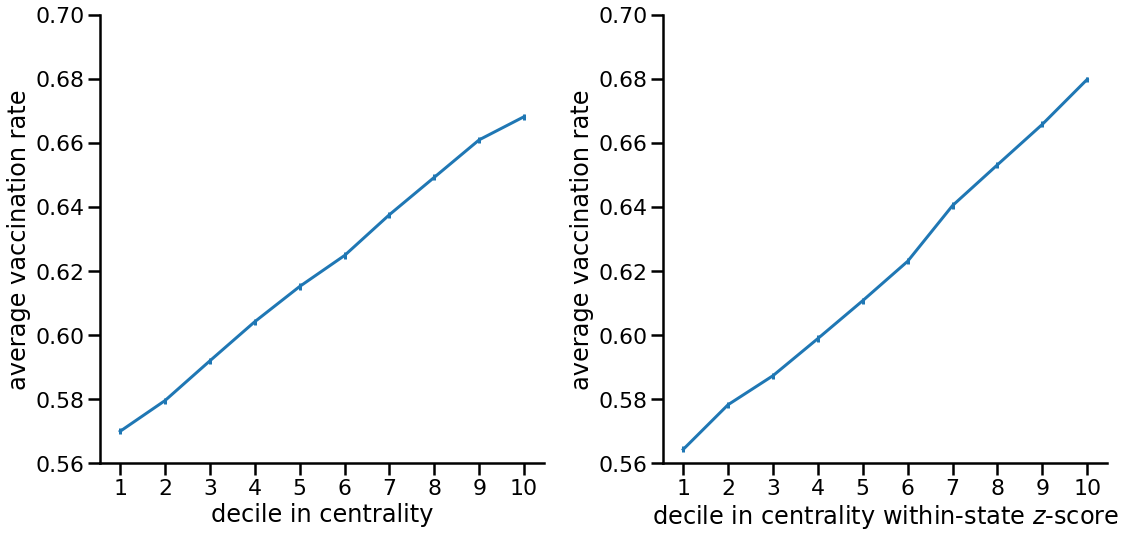

In [150]:
plt.figure(figsize=(16, 8))

plt.subplot(121)

plt.errorbar(
    range(10),
    data.groupby('decile_log_centrality')['vax'].mean(),
    yerr=data.groupby('decile_log_centrality')['vax'].std()/np.sqrt(data.groupby('decile_z_log_centrality')['vax'].count()-1)
)

plt.ylim(0.56, 0.7)
plt.xlabel('decile in centrality')
plt.ylabel('average vaccination rate')
plt.xticks(range(10), range(1, 11))

plt.subplot(122)

plt.errorbar(
    range(10),
    data.groupby('decile_z_log_centrality')['vax'].mean(),
    yerr=data.groupby('decile_z_log_centrality')['vax'].std()/np.sqrt(data.groupby('decile_z_log_centrality')['vax'].count()-1)
)

plt.ylim(0.56, 0.7)
plt.xlabel('decile in centrality within-state $z$-score')
plt.ylabel('average vaccination rate')
plt.xticks(range(10), range(1, 11))

plt.tight_layout()
sns.despine()

plt.savefig('../results/decile_centrality_2022.pdf')